In [ ]:
pip install datasets accelerate bitsandbytes xformers adjustText

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.7/222.7 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (1

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data1= pd.read_excel('/content/Srikanth dataset.xlsx')

In [ ]:
data1.head()

,Doc_Num,Title,Summary
0,B001,Enhancing National Security and Countering Mal...,"The ""Enhancing National Security and Counterin..."
1,B006,Ukraine Support and Security Enhancement Act,"The ""Ukraine Support and Security Enhancement ..."
2,B008,Safeguarding Elections Against Deepfake Manipu...,"The ""Safeguarding Elections Against Deepfake M..."
3,B018,Strengthening Global Democracy Act,"The ""Strengthening Global Democracy Act"" addre..."
4,B042,Ethiopia Democracy and Human Rights Support St...,"The ""Ethiopia Democracy and Human Rights Suppo..."


In [ ]:
data2=pd.read_excel('/content/Koushik_Data_Label.xlsx')

In [ ]:
data2.head()

,Doc_Num,Title,Summary
0,H707,Addressing Misinformation and Disinformation i...,The text discusses the challenges posed by mis...
1,H710,Addressing Misinformation and Accountability i...,The text highlights the importance of counteri...
2,H714,Combatting Counterfeit PPE: A Call for Action,This comprehensive text highlights the critica...
3,H722,Testimony Highlights: Department of Justice's ...,This passage presents a series of exchanges fr...
4,H736,Congressional Hearing on USAID Funding and For...,This excerpt is from a congressional hearing d...


In [ ]:
data3=pd.read_excel('/content/5731 DATA.xlsx')

In [ ]:
data3.head()

,Doc_Num,Title,Summary
0,H314,Addressing Evolving Threats: Testimonies on Ho...,Testimonies from officials and experts highlig...
1,H343,Addressing Malign Influence and Disinformation...,Testimonies and discussions underscore the gro...
2,H348,"Addressing the Threat of Misinformation, Disin...",Testimonies and discussions highlight the ongo...
3,H358,Safeguarding the Integrity of Elections Amidst...,Despite facing unprecedented challenges such a...
4,H362,Addressing Discrimination and Misinformation i...,"The passage of Pub. L. 117-2, the American Res..."


In [ ]:
data4=pd.read_excel('/content/INFO-5731.xlsx')

In [ ]:
data4.head()

,Doc_Num,Title,Summary
0,B369,Election Integrity and Improvement Act of 2021,"The ""Election Integrity and Improvement Act of..."
1,B371,Resolution on Russian Government Actions in Ve...,The resolution expresses deep concern by the U...
2,B373,Senate Resolution on Accountability and Human ...,The resolution reaffirms the Senate's support ...
3,B376,Senate Resolution Against Anti-Asian Racism an...,The resolution condemns and denounces all form...
4,B379,Drug Manufacturer Compliance and Penalties Act,The section establishes penalties for drug man...


In [ ]:
data=pd.concat([data1,data2,data3,data4])

In [ ]:
data.head()

,Doc_Num,Title,Summary
0,B001,Enhancing National Security and Countering Mal...,"The ""Enhancing National Security and Counterin..."
1,B006,Ukraine Support and Security Enhancement Act,"The ""Ukraine Support and Security Enhancement ..."
2,B008,Safeguarding Elections Against Deepfake Manipu...,"The ""Safeguarding Elections Against Deepfake M..."
3,B018,Strengthening Global Democracy Act,"The ""Strengthening Global Democracy Act"" addre..."
4,B042,Ethiopia Democracy and Human Rights Support St...,"The ""Ethiopia Democracy and Human Rights Suppo..."


In [ ]:
data.shape

(179, 3)

In [ ]:
data.isnull().sum()

Doc_Num    0
Title      2
Summary    2
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

Doc_Num    0
Title      0
Summary    0
dtype: int64

In [ ]:
titles=list(data['Summary'])

In [ ]:
#Lower Case
titles=[title.lower() for title in titles]
titles[0:5]

['the "enhancing national security and countering malign influence act" encompasses various provisions aimed at bolstering the united states\' capabilities to combat foreign malign influence, particularly in the realms of cybersecurity, information literacy, and countering disinformation campaigns. key aspects include the establishment of a working group to identify and counter foreign influence mediums, enhanced training programs for servicemembers and department of defense civilian employees, and regular reporting requirements to assess the effectiveness of these efforts. additionally, the act emphasizes the importance of nato alliances, efforts to counter adversary use of ransomware, and initiatives to promote security and stability in regions such as the western balkans. it also addresses strategic competition with countries like china and russia, including measures to expose and deter malign influence activities.',
 'the "ukraine support and security enhancement act" outlines key 

In [ ]:
#Removing Numbers
import re
titles=[re.sub(r'\d+', '', title) for title in titles]
titles[0:5]

['the "enhancing national security and countering malign influence act" encompasses various provisions aimed at bolstering the united states\' capabilities to combat foreign malign influence, particularly in the realms of cybersecurity, information literacy, and countering disinformation campaigns. key aspects include the establishment of a working group to identify and counter foreign influence mediums, enhanced training programs for servicemembers and department of defense civilian employees, and regular reporting requirements to assess the effectiveness of these efforts. additionally, the act emphasizes the importance of nato alliances, efforts to counter adversary use of ransomware, and initiatives to promote security and stability in regions such as the western balkans. it also addresses strategic competition with countries like china and russia, including measures to expose and deter malign influence activities.',
 'the "ukraine support and security enhancement act" outlines key 

In [ ]:
#Removing white spaces
titles=[title.strip() for title in titles]
titles[0:5]

['the "enhancing national security and countering malign influence act" encompasses various provisions aimed at bolstering the united states\' capabilities to combat foreign malign influence, particularly in the realms of cybersecurity, information literacy, and countering disinformation campaigns. key aspects include the establishment of a working group to identify and counter foreign influence mediums, enhanced training programs for servicemembers and department of defense civilian employees, and regular reporting requirements to assess the effectiveness of these efforts. additionally, the act emphasizes the importance of nato alliances, efforts to counter adversary use of ransomware, and initiatives to promote security and stability in regions such as the western balkans. it also addresses strategic competition with countries like china and russia, including measures to expose and deter malign influence activities.',
 'the "ukraine support and security enhancement act" outlines key 

In [ ]:
#Remove Special Characters and Punctuation
titles=[re.sub(r'[^\w\s]', '', title) for title in titles]
titles[0:5]

['the enhancing national security and countering malign influence act encompasses various provisions aimed at bolstering the united states capabilities to combat foreign malign influence particularly in the realms of cybersecurity information literacy and countering disinformation campaigns key aspects include the establishment of a working group to identify and counter foreign influence mediums enhanced training programs for servicemembers and department of defense civilian employees and regular reporting requirements to assess the effectiveness of these efforts additionally the act emphasizes the importance of nato alliances efforts to counter adversary use of ransomware and initiatives to promote security and stability in regions such as the western balkans it also addresses strategic competition with countries like china and russia including measures to expose and deter malign influence activities',
 'the ukraine support and security enhancement act outlines key policies and strate

In [ ]:
#Removing Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
titles=[' '.join([word for word in title.split() if word not in stop_words]) for title in titles]
titles[0:5]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['enhancing national security countering malign influence act encompasses various provisions aimed bolstering united states capabilities combat foreign malign influence particularly realms cybersecurity information literacy countering disinformation campaigns key aspects include establishment working group identify counter foreign influence mediums enhanced training programs servicemembers department defense civilian employees regular reporting requirements assess effectiveness efforts additionally act emphasizes importance nato alliances efforts counter adversary use ransomware initiatives promote security stability regions western balkans also addresses strategic competition countries like china russia including measures expose deter malign influence activities',
 'ukraine support security enhancement act outlines key policies strategies aimed bolstering ukraines territorial integrity sovereignty countering russian malign activities region emphasizes diplomatic support ukraine partic

In [ ]:
#Tokenization
nltk.download('punkt')
from nltk.tokenize import word_tokenize
titles=[word_tokenize(title) for title in titles]
titles[0:5]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[['enhancing',
  'national',
  'security',
  'countering',
  'malign',
  'influence',
  'act',
  'encompasses',
  'various',
  'provisions',
  'aimed',
  'bolstering',
  'united',
  'states',
  'capabilities',
  'combat',
  'foreign',
  'malign',
  'influence',
  'particularly',
  'realms',
  'cybersecurity',
  'information',
  'literacy',
  'countering',
  'disinformation',
  'campaigns',
  'key',
  'aspects',
  'include',
  'establishment',
  'working',
  'group',
  'identify',
  'counter',
  'foreign',
  'influence',
  'mediums',
  'enhanced',
  'training',
  'programs',
  'servicemembers',
  'department',
  'defense',
  'civilian',
  'employees',
  'regular',
  'reporting',
  'requirements',
  'assess',
  'effectiveness',
  'efforts',
  'additionally',
  'act',
  'emphasizes',
  'importance',
  'nato',
  'alliances',
  'efforts',
  'counter',
  'adversary',
  'use',
  'ransomware',
  'initiatives',
  'promote',
  'security',
  'stability',
  'regions',
  'western',
  'balkans',
  '

In [ ]:
#Lemmetization using NLTK and also remvoing words less than 2 in length
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemme11=[]
for title in titles:
    lemme12=[]
    for word in title:
        lemme=lemmatizer.lemmatize(word)
        if len(lemme)>2:
            lemme12.append(lemme)
    lemme11.append(' '.join(lemme12))
lemme11[0:5]

[nltk_data] Downloading package wordnet to /root/nltk_data...


['enhancing national security countering malign influence act encompasses various provision aimed bolstering united state capability combat foreign malign influence particularly realm cybersecurity information literacy countering disinformation campaign key aspect include establishment working group identify counter foreign influence medium enhanced training program servicemembers department defense civilian employee regular reporting requirement ass effectiveness effort additionally act emphasizes importance nato alliance effort counter adversary use ransomware initiative promote security stability region western balkan also address strategic competition country like china russia including measure expose deter malign influence activity',
 'ukraine support security enhancement act outline key policy strategy aimed bolstering ukraine territorial integrity sovereignty countering russian malign activity region emphasizes diplomatic support ukraine particularly deterring russian aggression

In [ ]:
title=lemme11

In [ ]:
len(title)

177

In [ ]:
pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 26.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 18.0 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 7.9 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039278 sha256=420ed0cceec4a88942795e6ece62eca9428e0aa680ac656004cd87ef4f6b898e
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Foun

In [ ]:
from bertopic import BERTopic
model = BERTopic()
topics, _ = model.fit_transform(title)
topics=model.get_topic_info()
topics

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

,Topic,Count,Name,Representation,Representative_Docs
0,-1,47,-1_disinformation_information_act_census,"[disinformation, information, act, census, str...",[usaid actively addressing challenge posed cov...
1,0,43,0_misinformation_health_covid_public,"[misinformation, health, covid, public, pandem...",[discussion highlight critical need combat mis...
2,1,24,1_cyber_threat_cybersecurity_security,"[cyber, threat, cybersecurity, security, attac...",[today threat homeland security encompass cybe...
3,2,19,2_election_postal_voting_integrity,"[election, postal, voting, integrity, foreign,...",[covid pandemic continues challenge election a...
4,3,19,3_china_influence_chinese_act,"[china, influence, chinese, act, disinformatio...",[countering chinese political influence operat...
5,4,13,4_terrorism_domestic_capitol_extremist,"[terrorism, domestic, capitol, extremist, addr...",[passage highlight increasing threat domestic ...
6,5,12,5_russian_georgia_disinformation_russia,"[russian, georgia, disinformation, russia, inf...",[act emphasizes enhancing assistance georgia c...


In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
from torch import cuda

model_id = 'meta-llama/Llama-2-13b-chat-hf'
#model_id = 'decapoda-research/llama-7b-hf'
device = f'cuda:{cuda.current_device()}' if cuda.is_available() else 'cpu'; print(device)

cuda:0


In [ ]:
from torch import bfloat16
import transformers

# Quantization to load an LLM with less GPU memory
bnb_config = transformers.BitsAndBytesConfig(
    load_in_4bit=True,  # 4-bit quantization
    bnb_4bit_quant_type='nf4',  # Normalized float 4
    bnb_4bit_use_double_quant=True,  # Second quantization after the first
    bnb_4bit_compute_dtype=bfloat16  # Computation type
)

In [ ]:
# Llama 2 Tokenizer
tokenizer = transformers.AutoTokenizer.from_pretrained(model_id)

# Llama 2 Model
model = transformers.AutoModelForCausalLM.from_pretrained(
    model_id,
    trust_remote_code=True,
    quantization_config=bnb_config,
    device_map='auto',
)
model.eval()

tokenizer_config.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/587 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/33.4k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/9.90G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/6.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(32000, 5120)
    (layers): ModuleList(
      (0-39): 40 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear4bit(in_features=5120, out_features=5120, bias=False)
          (k_proj): Linear4bit(in_features=5120, out_features=5120, bias=False)
          (v_proj): Linear4bit(in_features=5120, out_features=5120, bias=False)
          (o_proj): Linear4bit(in_features=5120, out_features=5120, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear4bit(in_features=5120, out_features=13824, bias=False)
          (up_proj): Linear4bit(in_features=5120, out_features=13824, bias=False)
          (down_proj): Linear4bit(in_features=13824, out_features=5120, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm()
        (post_attention_layernorm): LlamaRMSNorm()
      )
    )
    (norm): Lla

In [ ]:
# Our text generator
generator = transformers.pipeline(
    model=model, tokenizer=tokenizer,
    task='text-generation',
    temperature=0.1,
    max_new_tokens=500,
    repetition_penalty=1.1
)

In [ ]:
# System prompt describes information given to all conversations
system_prompt = """
<s>[INST] <<SYS>>
You are a helpful, respectful and honest assistant for labeling topics.
<</SYS>>
"""

In [ ]:
# Example prompt demonstrating the output we are looking for
example_prompt = """
I have a topic that contains the following documents:
- Traditional diets in most cultures were primarily plant-based with a little meat on top, but with the rise of industrial style meat production and factory farming, meat has become a staple food.
- Meat, but especially beef, is the word food in terms of emissions.
- Eating meat doesn't make you a bad person, not eating meat doesn't make you a good one.

The topic is described by the following keywords: 'meat, beef, eat, eating, emissions, steak, food, health, processed, chicken'.

Based on the information about the topic above, please create a short label of this topic. Make sure you to only return the label and nothing more.
[/INST] Environmental impacts of eating meat
"""

In [ ]:
# Our main prompt with documents ([DOCUMENTS]) and keywords ([KEYWORDS]) tags
main_prompt = """
[INST]
I have a topic that contains the following documents:
[DOCUMENTS]

The topic is described by the following keywords: '[KEYWORDS]'.

Based on the information about the topic above, please create a short label of this topic. Make sure you to only return the label and nothing more.
[/INST]
"""

In [ ]:
prompt = system_prompt + example_prompt + main_prompt

In [ ]:
from sentence_transformers import SentenceTransformer

# Pre-calculate embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(lemme11, show_progress_bar=True)

Batches:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
from umap import UMAP
from hdbscan import HDBSCAN

umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size=150, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [ ]:
# Pre-reduce embeddings for visualization purposes
reduced_embeddings = UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine', random_state=42).fit_transform(embeddings)

In [ ]:
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, TextGeneration

# KeyBERT
keybert = KeyBERTInspired()

# MMR
mmr = MaximalMarginalRelevance(diversity=0.3)

# Text generation with Llama 2
llama2 = TextGeneration(generator, prompt=prompt)

# All representation models
representation_model = {
    "KeyBERT": keybert,
    "Llama2": llama2,
    "MMR": mmr,
}

In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(
  representation_model=representation_model,
  verbose=True
)

# Train model
topics, probs = topic_model.fit_transform(lemme11)

2024-05-04 15:19:48,534 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/6 [00:00<?, ?it/s]

2024-05-04 15:19:49,436 - BERTopic - Embedding - Completed ✓
2024-05-04 15:19:49,439 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-05-04 15:19:52,318 - BERTopic - Dimensionality - Completed ✓
2024-05-04 15:19:52,320 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-05-04 15:19:52,354 - BERTopic - Cluster - Completed ✓
2024-05-04 15:19:52,363 - BERTopic - Representation - Extracting topics from clusters using representation models.
100%|██████████| 7/7 [01:14<00:00, 10.58s/it]
2024-05-04 15:21:07,071 - BERTopic - Representation - Completed ✓


In [ ]:
topics=topic_model.get_topic_info()
topics

,Topic,Count,Name,Representation,KeyBERT,Llama2,MMR,Representative_Docs
0,-1,46,-1_disinformation_information_misinformation_c...,"[disinformation, information, misinformation, ...","[disinformation, security, campaign, threat, c...","[""Combating Misinformation and Disinformation ...","[disinformation, information, misinformation, ...",[text discus critical role department state de...
1,0,44,0_misinformation_health_covid_pandemic,"[misinformation, health, covid, pandemic, publ...","[pandemic, disinformation, outbreak, covid, mi...",[Combating Misinformation in Public Health: Th...,"[misinformation, health, covid, pandemic, publ...",[discussion highlight critical need combat mis...
2,1,23,1_election_integrity_foreign_postal,"[election, integrity, foreign, postal, act, vo...","[election, voter, campaign, voting, ballot, el...","[Election Integrity and Security, , , , , , , ...","[election, integrity, foreign, postal, act, vo...",[text discus challenge posed misinformation di...
3,2,20,2_cyber_threat_cybersecurity_security,"[cyber, threat, cybersecurity, security, attac...","[cybersecurity, cyberattacks, security, threat...",[Cybersecurity Threats and Evolving Challenges...,"[cyber, threat, cybersecurity, security, attac...",[today threat homeland security encompass cybe...
4,3,18,3_china_chinese_influence_act,"[china, chinese, influence, act, disinformatio...","[sanction, regime, accountability, china, taiw...","[Countering Chinese Influence Operations, , , ...","[china, chinese, influence, act, disinformatio...",[text outline growing concern china expanding ...
5,4,13,4_russian_georgia_disinformation_influence,"[russian, georgia, disinformation, influence, ...","[russian, russia, putin, kremlin, diplomatic, ...","[Countering Russian Influence Abroad, , , , , ...","[russian, georgia, disinformation, influence, ...",[act emphasizes enhancing assistance georgia c...
6,5,13,5_terrorism_domestic_extremist_capitol,"[terrorism, domestic, extremist, capitol, addr...","[terrorism, extremism, terrorist, threat, viol...","[Combating Domestic Terrorism, , , , , , , , , ]","[terrorism, domestic, extremist, capitol, addr...",[passage highlight increasing threat domestic ...


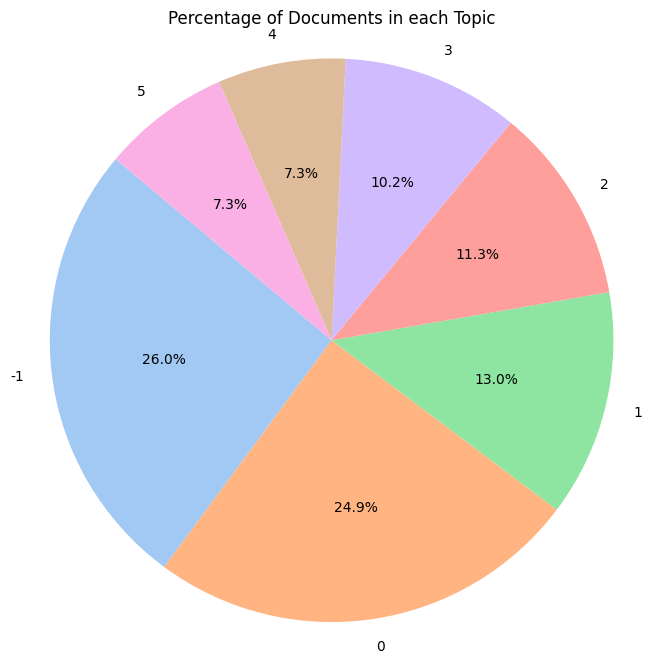

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.pie(topics['Count'], labels=topics['Topic'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Percentage of Documents in each Topic')
plt.show()

In [ ]:
topics['Count']

0    46
1    44
2    23
3    20
4    18
5    13
6    13
Name: Count, dtype: int64

In [ ]:
topic_model.visualize_barchart(top_n_topics=10)

In [ ]:
topic_model.visualize_heatmap()

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_documents(lemme11, embeddings=embeddings)

In [ ]:
for x in list(topics['Llama2']):
  if x != '':
    print(x)

['"Combating Misinformation and Disinformation in National Security and Census"', '', '', '', '', '', '', '', '', '']
['Combating Misinformation in Public Health: The Role of Social Science and Scientific Research', '', '', '', '', '', '', '', '', '']
['Election Integrity and Security', '', '', '', '', '', '', '', '', '']
['Cybersecurity Threats and Evolving Challenges', '', '', '', '', '', '', '', '', '']
['Countering Chinese Influence Operations', '', '', '', '', '', '', '', '', '']
['Countering Russian Influence Abroad', '', '', '', '', '', '', '', '', '']
['Combating Domestic Terrorism', '', '', '', '', '', '', '', '', '']


In [ ]:
top_doc=topic_model.get_document_info(lemme11)

In [ ]:
top_doc.columns

Index(['Document', 'Topic', 'Name', 'Representation', 'KeyBERT', 'Llama2',
       'MMR', 'Representative_Docs', 'Top_n_words', 'Probability',
       'Representative_document'],
      dtype='object')

In [ ]:
top_doc[['Document','Llama2']].to_excel('DocTopMisinformationPolicy.xlsx')